## Trajectory of a single patient

References
- https://github.com/MIT-LCP/mimic-workshop/blob/b27eee438a1f62d909dd30d1d458d3516f32b276/intro_to_mimic/01-example-patient-heart-failure.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, './db')
import db_con
import sqlalchemy

#### Sepsis 환자(25030)의 ICU 기록 중 하나를 선택(276176)

In [3]:
# load chartevents
# chartevents contain variables such as heart rate, respiratory rate, temperature
engine = db_con.get_engine()
pat = pd.read_sql("""
                    SELECT de.icustay_id, de.mins, de.value, de.valuenum, de.itemid, di.label
                    FROM (SELECT
                            de.icustay_id,
                            EXTRACT(MINUTE FROM de.charttime - (SELECT intime
                                                              FROM icustays
                                                              WHERE icustay_id = 256064)) AS mins,
                            de.value,
                            de.valuenum,
                            de.itemid
                          FROM chartevents de
                          WHERE icustay_id = 256064) AS de
                      INNER JOIN (SELECT
                                    di.label,
                                    di.itemid
                                  FROM d_items di) AS di
                        ON de.itemid = di.itemid
                    ORDER BY mins;
                    """, engine)

In [4]:
pat.head()

,icustay_id,mins,value,valuenum,itemid,label
0,256064,0.0,69,69.0,220045,Heart Rate
1,256064,0.0,16,16.0,220210,Respiratory Rate
2,256064,0.0,72,72.0,220045,Heart Rate
3,256064,0.0,120,120.0,220046,Heart rate Alarm - High
4,256064,0.0,35,35.0,224161,Resp Alarm - High


### Heart rate

In [5]:
pat[pat.label.str.find('Heart Rate')>=0]
# pat[pat.label.str.find('Temp')>=0]

,icustay_id,mins,value,valuenum,itemid,label
0,256064,0.0,69,69.0,220045,Heart Rate
2,256064,0.0,72,72.0,220045,Heart Rate
8,256064,0.0,50,50.0,220047,Heart Rate Alarm - Low
37,256064,0.0,57,57.0,220045,Heart Rate
59,256064,0.0,60,60.0,220047,Heart Rate Alarm - Low
162,256064,1.0,60,60.0,220047,Heart Rate Alarm - Low
165,256064,1.0,68,68.0,220045,Heart Rate
207,256064,1.0,50,50.0,220047,Heart Rate Alarm - Low
308,256064,2.0,68,68.0,220045,Heart Rate
694,256064,3.0,60,60.0,220047,Heart Rate Alarm - Low


환자의 심박수 변화
시간(x), 심박수 변수(y)를 기반으로 타임시리즈 차트를 구성한다.

In [6]:
pat.index[pat.label=='Heart Rate']

Int64Index([    0,     2,    37,   165,   308,   758,   838,   906,   979,
              983,
            ...
            41202, 41304, 41864, 42044, 42401, 42433, 42479, 42504, 42576,
            42586],
           dtype='int64', length=709)

In [7]:
x = pat.mins[pat.label=='Heart Rate']
y = pat.valuenum[pat.label=='Heart Rate']

<Figure size 1440x360 with 0 Axes>

Text(0.5,0,'minutes after admission')

Text(0,0.5,'Heart Rate')

Text(0.5,1,'Heart rate change over time from admission to icu')

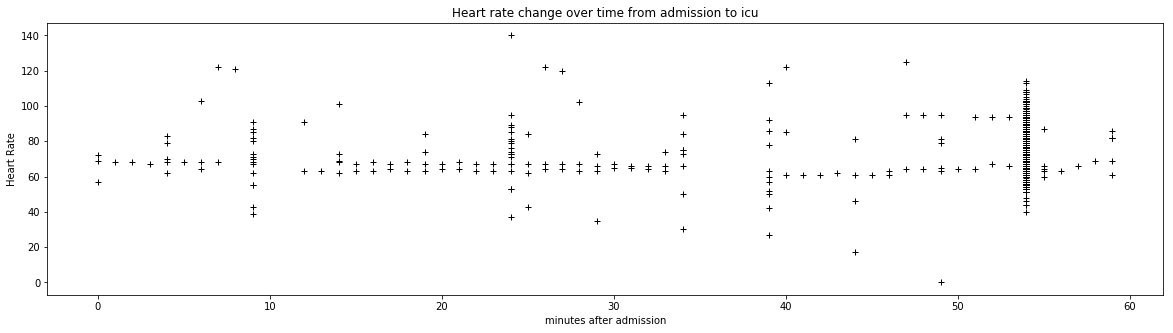

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, 'k+')

plt.xlabel('minutes after admission')
plt.ylabel('Heart Rate')
plt.title('Heart rate change over time from admission to icu')

세로 줄로 표시되는 부분은 1분 내 여러번 측정해서 값이 range로 존재하는 경우입니다.

In [9]:
pat[(pat.mins==19) & (pat.label=='Heart Rate')]

,icustay_id,mins,value,valuenum,itemid,label
7490,256064,19.0,63,63.0,220045,Heart Rate
7519,256064,19.0,74,74.0,220045,Heart Rate
7602,256064,19.0,67,67.0,220045,Heart Rate
7740,256064,19.0,84,84.0,220045,Heart Rate


### Respiratory Rate

In [10]:
pat[pat.label=='Respiratory Rate']

,icustay_id,mins,value,valuenum,itemid,label
1,256064,0.0,16,16.0,220210,Respiratory Rate
33,256064,0.0,4,4.0,220210,Respiratory Rate
57,256064,0.0,30,30.0,220210,Respiratory Rate
157,256064,1.0,14,14.0,220210,Respiratory Rate
160,256064,1.0,20,20.0,220210,Respiratory Rate
344,256064,2.0,15,15.0,220210,Respiratory Rate
742,256064,3.0,14,14.0,220210,Respiratory Rate
839,256064,4.0,13,13.0,220210,Respiratory Rate
905,256064,4.0,25,25.0,220210,Respiratory Rate
980,256064,4.0,14,14.0,220210,Respiratory Rate


환자의 상태가 위험 경계를 넘어간 경우가 있나요?  
ICU에서 경계 알람 값을 지정할 때 대부분의 경우 너무 높거나 너무 낮은 값에 알람을 세팅하게 되는데, False 알람을 줄이기 위해서 경계 값을 조절하는 경우도 있습니다.

In [11]:
pat[pat.label.str.find('Resp Alarm')>=0]

,icustay_id,mins,value,valuenum,itemid,label
4,256064,0.0,35,35.0,224161,Resp Alarm - High
5,256064,0.0,8,8.0,224162,Resp Alarm - Low
6,256064,0.0,35,35.0,224161,Resp Alarm - High
7,256064,0.0,8,8.0,224162,Resp Alarm - Low
158,256064,1.0,30,30.0,224161,Resp Alarm - High
159,256064,1.0,8,8.0,224162,Resp Alarm - Low
168,256064,1.0,8,8.0,224162,Resp Alarm - Low
169,256064,1.0,35,35.0,224161,Resp Alarm - High
827,256064,3.0,30,30.0,224161,Resp Alarm - High
828,256064,3.0,8,8.0,224162,Resp Alarm - Low


<Figure size 1440x720 with 0 Axes>

Text(0.5,0,'minutes after admission')

Text(0,0.5,'Respiratory Rate')

Text(0.5,1,'Respiratory Rate change over time from admission to icu')

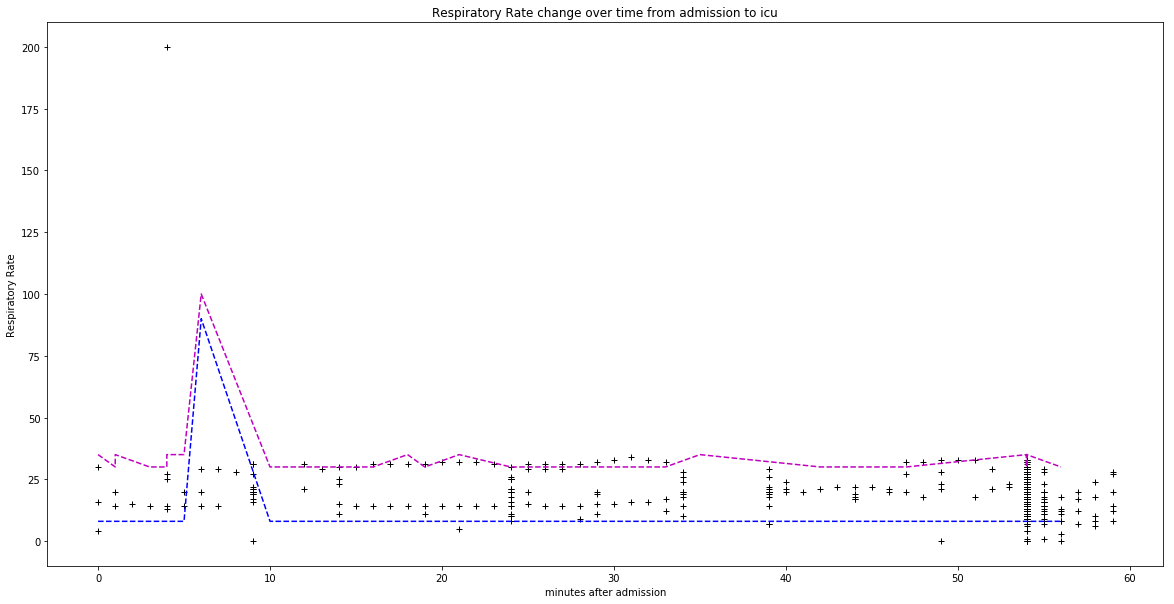

In [12]:
plt.figure(figsize=(20, 10))

plt.plot(pat.mins[pat.label=='Respiratory Rate'],
        pat.valuenum[pat.label=='Respiratory Rate'],
        'k+')

plt.plot(pat.mins[pat.label=='Resp Alarm - High'],
        pat.valuenum[pat.label=='Resp Alarm - High'],
        'm--')

plt.plot(pat.mins[pat.label=='Resp Alarm - Low'],
        pat.valuenum[pat.label=='Resp Alarm - Low'],
        'b--')

plt.xlabel('minutes after admission')
plt.ylabel('Respiratory Rate')
plt.title('Respiratory Rate change over time from admission to icu')

## 의학적 의견
- 호흡수를 기준으로 알람이 울렸을 만한 시점?
- outlier에 대한 적절한 설명

## 체온

In [13]:
# 체온 관련 라벨들
pat[pat.label.str.find('Temperature')>=0].label.unique()

array(['Temperature Site', 'Temperature Fahrenheit', 'Skin Temperature',
       'Temperature Celsius'], dtype=object)

In [14]:
pat[pat.label.str.find('Temperature Celsius')>=0].shape

(74, 6)

In [15]:
pat[pat.label.str.find('Temperature Fahrenheit')>=0].shape

(110, 6)

In [16]:
pat_fah = pat[pat.label.str.find('Temperature Fahrenheit')>=0]
pat_fah.reset_index(drop=True)

,icustay_id,mins,value,valuenum,itemid,label
0,256064,0.0,97,97.0,223761,Temperature Fahrenheit
1,256064,9.0,98.4,98.4,223761,Temperature Fahrenheit
2,256064,9.0,98.8,98.8,223761,Temperature Fahrenheit
3,256064,24.0,98.4,98.4,223761,Temperature Fahrenheit
4,256064,24.0,97.3,97.3,223761,Temperature Fahrenheit
5,256064,24.0,96.6,96.6,223761,Temperature Fahrenheit
6,256064,33.0,95.4,95.4,223761,Temperature Fahrenheit
7,256064,34.0,98.9,98.9,223761,Temperature Fahrenheit
8,256064,39.0,96.3,96.3,223761,Temperature Fahrenheit
9,256064,49.0,98.7,98.7,223761,Temperature Fahrenheit


In [17]:
# Fahrenheit체온 값을 Celsius 값으로 변환
pat_fah['valuenum'] = pat_fah.valuenum.map(lambda x: (x - 32)*(5/9))
pat_fah.head()

/Users/grace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,icustay_id,mins,value,valuenum,itemid,label
29,256064,0.0,97,36.111111,223761,Temperature Fahrenheit
2930,256064,9.0,98.4,36.888889,223761,Temperature Fahrenheit
3002,256064,9.0,98.8,37.111111,223761,Temperature Fahrenheit
9558,256064,24.0,98.4,36.888889,223761,Temperature Fahrenheit
9842,256064,24.0,97.3,36.277778,223761,Temperature Fahrenheit


In [18]:
pat_temp = pd.concat([pat[pat.label.str.find('Temperature Celsius')>=0], 
                      pat_fah])
pat_temp.sort_values(by='mins')
pat_temp.shape

,icustay_id,mins,value,valuenum,itemid,label
29,256064,0.0,97,36.111111,223761,Temperature Fahrenheit
3136,256064,9.0,36.2,36.200000,223762,Temperature Celsius
3169,256064,9.0,37.3,37.300000,223762,Temperature Celsius
2930,256064,9.0,98.4,36.888889,223761,Temperature Fahrenheit
3002,256064,9.0,98.8,37.111111,223761,Temperature Fahrenheit
9558,256064,24.0,98.4,36.888889,223761,Temperature Fahrenheit
9842,256064,24.0,97.3,36.277778,223761,Temperature Fahrenheit
9843,256064,24.0,96.6,35.888889,223761,Temperature Fahrenheit
13288,256064,33.0,95.4,35.222222,223761,Temperature Fahrenheit
13394,256064,34.0,98.9,37.166667,223761,Temperature Fahrenheit


(184, 6)

<Figure size 1440x720 with 0 Axes>

Text(0.5,0,'minutes after admission')

Text(0,0.5,'Temperate(Celsius)')

Text(0.5,1,'Temperate change over time from admission to icu')

(32, 40)

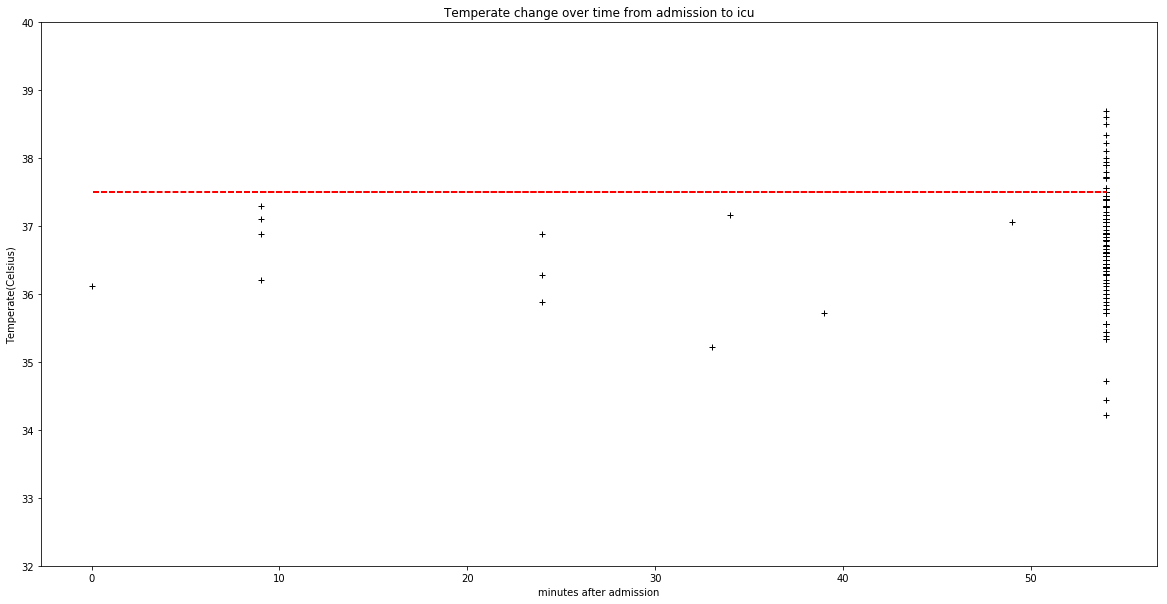

In [19]:
plt.figure(figsize=(20, 10))

plt.plot(pat_temp.mins, pat_temp.valuenum, 'k+')
plt.plot(pat_temp.mins, [37.5]*len(pat_temp.valuenum), 'r--')

plt.xlabel('minutes after admission')
plt.ylabel('Temperate(Celsius)')
plt.title('Temperate change over time from admission to icu')
plt.ylim(32, 40)

### GCS(Glasgow Coma Scale) 환자의 의식 판단
ICU에서 환자의 상태를 모니터링할 때 주로 활용한다. 주로 세가지 라벨이 있는데 Eye, verbal, motor response 등이 있다.

In [20]:
pat[pat.label=='GCS - Eye Opening'].head()

,icustay_id,mins,value,valuenum,itemid,label
280,256064,2.0,To Speech,3.0,220739,GCS - Eye Opening
288,256064,2.0,To Speech,3.0,220739,GCS - Eye Opening
823,256064,3.0,To Pain,2.0,220739,GCS - Eye Opening
844,256064,4.0,None,1.0,220739,GCS - Eye Opening
954,256064,4.0,To Speech,3.0,220739,GCS - Eye Opening


<Figure size 1440x720 with 0 Axes>

Text(2,165,'To Speech')

Text(9,165,'To Speech')

Text(15,165,'To Pain')

Text(21,165,'Spontaneously')

Text(31,165,'To Pain')

Text(41,165,'To Speech')

Text(54,165,'To Speech')

Text(54,165,'None')

Text(-20,165,'GCS - Eye Opening')

Text(2,150,'No response')

Text(10,150,'Localizes Pain')

Text(19,150,'No response')

Text(31,150,'No response')

Text(45,150,'Flex-withdraws')

Text(54,150,'Localizes Pain')

Text(-20,150,'GCS - Motor Response')

Text(2,135,'No Response-ETT')

Text(10,135,'No Response-ETT')

Text(19,135,'No Response-ETT')

Text(31,135,'No Response')

Text(42,135,'No Response-ETT')

Text(54,135,'No Response-ETT')

Text(-20,135,'GCS - Verbal Response')

Text(0.5,1,'Vital Sign and GCS change over time from admission')

Text(0.5,0,'Time (mins)')

Text(0,0.5,'Respiratory Rate, Temperature, Heart rate or GCS')

(10, 170)

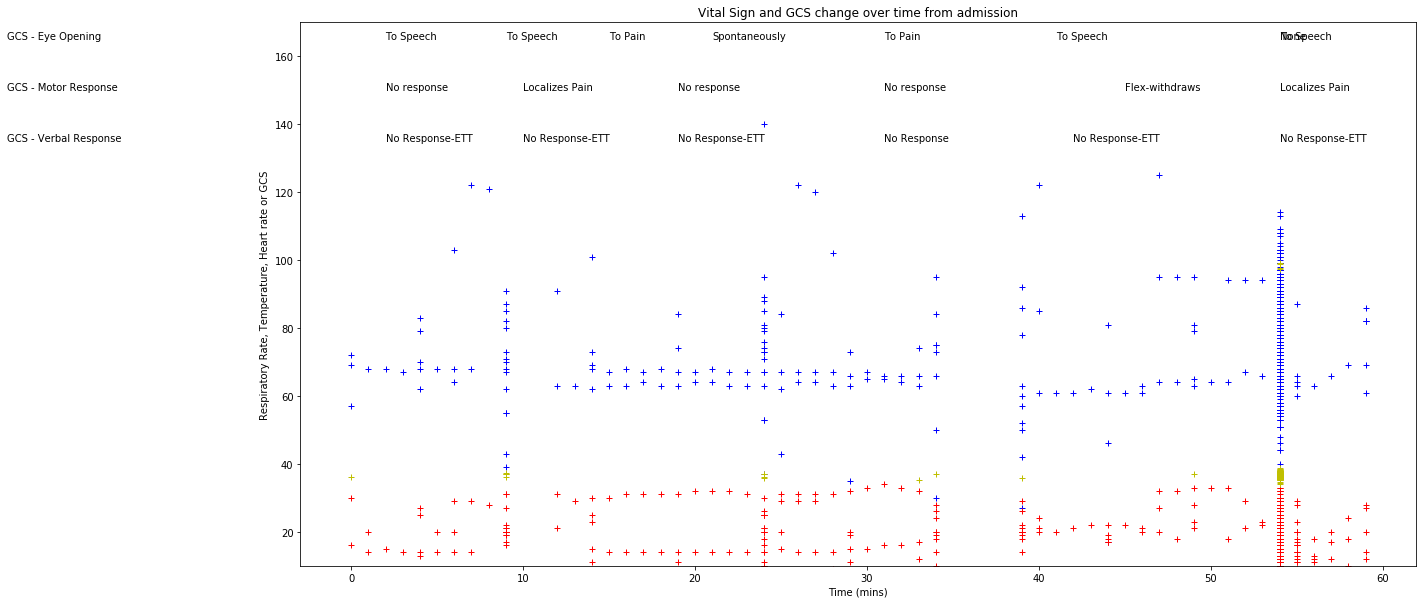

In [21]:
plt.figure(figsize=(20, 10))

# heart rate
plt.plot(pat.mins[pat.label=='Heart Rate'], pat.valuenum[pat.label=='Heart Rate'], 'b+')

# respiratory rate
plt.plot(pat.mins[pat.label=='Respiratory Rate'], pat.valuenum[pat.label=='Respiratory Rate'], 'r+')

# temperate
plt.plot(pat_temp.mins, pat_temp.valuenum, 'y+')

# GCS plot annotate to avoid overlap
for i, val in enumerate(pat.value[pat.label=='GCS - Eye Opening'].values):
    if i%8==0 and i<60:
        plt.annotate(val, (pat.mins[pat.label=='GCS - Eye Opening'].values[i], 165))
plt.text(-20, 165, 'GCS - Eye Opening')

for i, val in enumerate(pat.value[pat.label=='GCS - Motor Response'].values):
    if i%10==0 and i<60:
        plt.annotate(val, (pat.mins[pat.label=='GCS - Motor Response'].values[i], 150))
plt.text(-20, 150, 'GCS - Motor Response')

for i, val in enumerate(pat.value[pat.label=='GCS - Verbal Response'].values):
    if i%10==0 and i<60:
        plt.annotate(val, (pat.mins[pat.label=='GCS - Verbal Response'].values[i], 135))
plt.text(-20, 135, 'GCS - Verbal Response')

plt.title('Vital Sign and GCS change over time from admission')
plt.xlabel('Time (mins)')
plt.ylabel('Respiratory Rate, Temperature, Heart rate or GCS')
plt.ylim(10, 170)

## 의학적 의견
- 환자의 의식의 변화

## creatinine

In [22]:
pat[pat.label=='Creatinine']

,icustay_id,mins,value,valuenum,itemid,label
23,256064,0.0,2.1,2.1,220615,Creatinine
403,256064,2.0,1.9,1.9,220615,Creatinine
1525,256064,5.0,2.4,2.4,220615,Creatinine
2304,256064,7.0,2.8,2.8,220615,Creatinine
2360,256064,8.0,1.8,1.8,220615,Creatinine
2554,256064,8.0,2.2,2.2,220615,Creatinine
3152,256064,9.0,2.8,2.8,220615,Creatinine
3593,256064,10.0,1.9,1.9,220615,Creatinine
7710,256064,19.0,2.5,2.5,220615,Creatinine
8601,256064,22.0,1.8,1.8,220615,Creatinine


<Figure size 1440x720 with 0 Axes>

Text(0.5,0,'minutes after admission')

Text(0,0.5,'Creatinine')

Text(0.5,1,'Creatinine change over time from admission to icu')

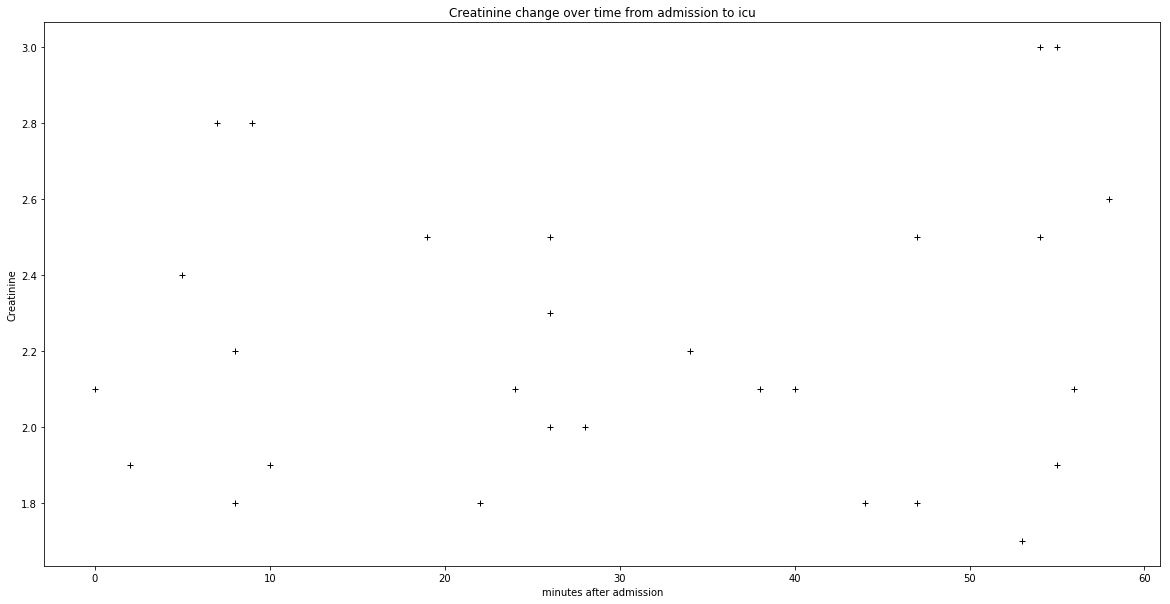

In [23]:
plt.figure(figsize=(20, 10))

plt.plot(pat[pat.label=='Creatinine'].mins, pat[pat.label=='Creatinine'].valuenum, 'k+')

plt.xlabel('minutes after admission')
plt.ylabel('Creatinine')
plt.title('Creatinine change over time from admission to icu')